In [ ]:
pip install ezdxf pandas

In [ ]:
import ezdxf
import pandas as pd

# === 1. Baca file DXF dari session storage ===
# Pastikan path sesuai lokasi file kamu
file_path = "/sample_engineering_schematic.dxf"  # atau "/content/sample_engineering_schematic.dxf"

try:
    doc = ezdxf.readfile(file_path)
    print("✅ File DXF berhasil dibaca dari session storage")
except Exception as e:
    print(f"❌ Gagal membaca file DXF: {e}")
    raise

modelspace = doc.modelspace()

# === 2. List untuk menyimpan data ===
data = []

# === 3. Loop semua entitas di modelspace ===
for entity in modelspace:
    etype = entity.dxftype()
    layer = entity.dxf.layer

    if etype == "LINE":
        start = (entity.dxf.start.x, entity.dxf.start.y, entity.dxf.start.z)
        end = (entity.dxf.end.x, entity.dxf.end.y, entity.dxf.end.z)
        coords = f"Start: {start}, End: {end}"

    elif etype == "CIRCLE":
        center = (entity.dxf.center.x, entity.dxf.center.y, entity.dxf.center.z)
        radius = entity.dxf.radius
        coords = f"Center: {center}, Radius: {radius}"

    elif etype == "POINT":
        point = (entity.dxf.location.x, entity.dxf.location.y, entity.dxf.location.z)
        coords = f"Point: {point}"

    elif etype == "TEXT":
        insert = (entity.dxf.insert.x, entity.dxf.insert.y, entity.dxf.insert.z)
        text_value = entity.dxf.text
        coords = f"Insert: {insert}, Text: '{text_value}'"

    else:
        continue

    data.append({
        "Type": etype,
        "Layer": layer,
        "Coordinates": coords
    })

# === 4. Simpan ke CSV ===
df = pd.DataFrame(data)
output_file = "output_cad_data.csv"
df.to_csv(output_file, index=False)

print(f"✅ Berhasil mengekstrak {len(data)} entitas ke '{output_file}'")


✅ File DXF berhasil dibaca dari session storage
✅ Berhasil mengekstrak 6 entitas ke 'output_cad_data.csv'


In [3]:
import ezdxf
import pandas as pd
import math

# === 1. Baca file DXF dari session storage ===
file_path = "/sample_engineering_schematic.dxf"  # sesuaikan path

try:
    doc = ezdxf.readfile(file_path)
    print("✅ File DXF berhasil dibaca dari session storage")
except Exception as e:
    print(f"❌ Gagal membaca file DXF: {e}")
    raise

msp = doc.modelspace()

# === 2. List untuk menyimpan data ===
data = []

# === 3. Fungsi bantu untuk hitung panjang garis ===
def line_length(start, end):
    return math.dist(start, end)

# === 4. Fungsi bantu untuk hitung panjang polyline ===
def polyline_length(points):
    return sum(math.dist(points[i], points[i+1]) for i in range(len(points)-1))

# === 5. Loop semua entitas di modelspace ===
for e in msp:
    etype = e.dxftype()
    layer = e.dxf.layer
    coords = ""
    length = None
    area = None

    if etype == "LINE":
        start = (e.dxf.start.x, e.dxf.start.y, e.dxf.start.z)
        end = (e.dxf.end.x, e.dxf.end.y, e.dxf.end.z)
        coords = f"{start} -> {end}"
        length = line_length(start, end)

    elif etype == "CIRCLE":
        center = (e.dxf.center.x, e.dxf.center.y, e.dxf.center.z)
        radius = e.dxf.radius
        coords = f"Center: {center}, R: {radius}"
        area = math.pi * (radius ** 2)

    elif etype == "ARC":
        center = (e.dxf.center.x, e.dxf.center.y, e.dxf.center.z)
        radius = e.dxf.radius
        start_angle = math.radians(e.dxf.start_angle)
        end_angle = math.radians(e.dxf.end_angle)
        arc_length = abs(end_angle - start_angle) * radius
        coords = f"Center: {center}, R: {radius}, Start: {e.dxf.start_angle}, End: {e.dxf.end_angle}"
        length = arc_length

    elif etype in ("LWPOLYLINE", "POLYLINE"):
        points = [(p[0], p[1], 0) for p in e.get_points()] if etype == "LWPOLYLINE" else [(v.dxf.location.x, v.dxf.location.y, v.dxf.location.z) for v in e.vertices]
        coords = str(points)
        length = polyline_length(points)

    elif etype == "POINT":
        point = (e.dxf.location.x, e.dxf.location.y, e.dxf.location.z)
        coords = f"Point: {point}"

    elif etype == "TEXT":
        insert = (e.dxf.insert.x, e.dxf.insert.y, e.dxf.insert.z)
        text_value = e.dxf.text
        coords = f"Insert: {insert}, Text: '{text_value}'"

    elif etype == "MTEXT":
        insert = (e.dxf.insert.x, e.dxf.insert.y, e.dxf.insert.z)
        text_value = e.text
        coords = f"Insert: {insert}, MText: '{text_value}'"

    else:
        continue

    data.append({
        "Type": etype,
        "Layer": layer,
        "Coordinates": coords,
        "Length": length,
        "Area": area
    })

# === 6. Simpan ke CSV ===
df = pd.DataFrame(data)
df.to_csv("output_cad_data_extended.csv", index=False)

print(f"✅ Berhasil mengekstrak {len(data)} entitas ke 'output_cad_data_extended.csv'")


✅ File DXF berhasil dibaca dari session storage
✅ Berhasil mengekstrak 6 entitas ke 'output_cad_data_extended.csv'


              precision    recall  f1-score   support

        LINE       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



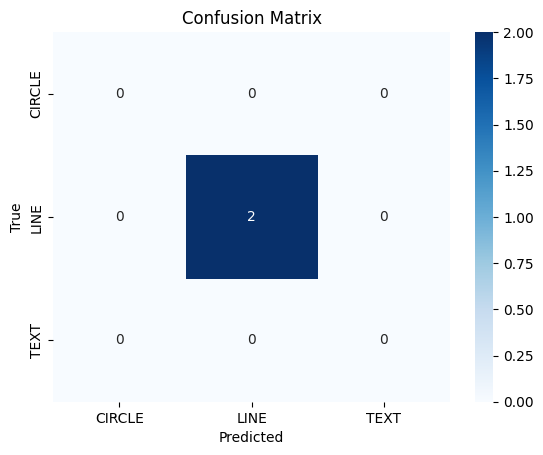

In [4]:
# 1. Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data CSV hasil ekstraksi CAD
df = pd.read_csv("output_cad_data_extended.csv")

# 3. Tentukan fitur & target
# Misalnya kita ingin memprediksi 'Type' berdasarkan fitur lainnya
X = df[['Layer', 'Length', 'Area']].copy()
y = df['Type']

# 4. Preprocessing pipeline
categorical_features = ['Layer']
numeric_features = ['Length', 'Area']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# 5. Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Train model
model.fit(X_train, y_train)

# 8. Evaluasi
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 9. Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [5]:
import ezdxf
import pandas as pd
import math

# === 1. Baca file DXF ===
file_path = "/sample_engineering_schematic.dxf"  # sesuaikan path
try:
    doc = ezdxf.readfile(file_path)
    print("✅ File DXF berhasil dibaca")
except Exception as e:
    print(f"❌ Gagal membaca file DXF: {e}")
    raise

msp = doc.modelspace()

# === 2. Fungsi bantu ===
def line_length(start, end):
    return math.dist(start, end)

def polyline_length(points):
    return sum(math.dist(points[i], points[i+1]) for i in range(len(points)-1))

def compute_bbox(points):
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    return min(xs), min(ys), max(xs), max(ys)

# === 3. Loop entitas ===
data = []
for e in msp:
    etype = e.dxftype()
    layer = e.dxf.layer
    coords = ""
    length = None
    area = None
    min_x = min_y = max_x = max_y = None

    if etype == "LINE":
        start = (e.dxf.start.x, e.dxf.start.y, e.dxf.start.z)
        end = (e.dxf.end.x, e.dxf.end.y, e.dxf.end.z)
        coords = f"{start} -> {end}"
        length = line_length(start, end)
        min_x, min_y, max_x, max_y = compute_bbox([start, end])

    elif etype == "CIRCLE":
        center = (e.dxf.center.x, e.dxf.center.y, e.dxf.center.z)
        r = e.dxf.radius
        coords = f"Center: {center}, R: {r}"
        area = math.pi * (r ** 2)
        min_x, min_y, max_x, max_y = center[0]-r, center[1]-r, center[0]+r, center[1]+r

    elif etype == "ARC":
        center = (e.dxf.center.x, e.dxf.center.y, e.dxf.center.z)
        r = e.dxf.radius
        coords = f"Center: {center}, R: {r}"
        start_angle = math.radians(e.dxf.start_angle)
        end_angle = math.radians(e.dxf.end_angle)
        length = abs(end_angle - start_angle) * r
        min_x, min_y, max_x, max_y = center[0]-r, center[1]-r, center[0]+r, center[1]+r

    elif etype in ("LWPOLYLINE", "POLYLINE"):
        points = [(p[0], p[1], 0) for p in e.get_points()] if etype == "LWPOLYLINE" else [(v.dxf.location.x, v.dxf.location.y, v.dxf.location.z) for v in e.vertices]
        coords = str(points)
        length = polyline_length(points)
        min_x, min_y, max_x, max_y = compute_bbox(points)

    elif etype == "POINT":
        point = (e.dxf.location.x, e.dxf.location.y, e.dxf.location.z)
        coords = f"Point: {point}"
        min_x = max_x = point[0]
        min_y = max_y = point[1]

    elif etype == "TEXT":
        insert = (e.dxf.insert.x, e.dxf.insert.y, e.dxf.insert.z)
        text_value = e.dxf.text
        coords = f"Insert: {insert}, Text: '{text_value}'"
        min_x = max_x = insert[0]
        min_y = max_y = insert[1]

    elif etype == "MTEXT":
        insert = (e.dxf.insert.x, e.dxf.insert.y, e.dxf.insert.z)
        text_value = e.text
        coords = f"Insert: {insert}, MText: '{text_value}'"
        min_x = max_x = insert[0]
        min_y = max_y = insert[1]

    else:
        continue

    data.append({
        "Type": etype,
        "Layer": layer,
        "Coordinates": coords,
        "Length": length,
        "Area": area,
        "Min_X": min_x,
        "Min_Y": min_y,
        "Max_X": max_x,
        "Max_Y": max_y
    })

# === 4. Simpan ke CSV ===
df = pd.DataFrame(data)
df.to_csv("output_cad_with_bbox.csv", index=False)
print(f"✅ Berhasil mengekstrak {len(data)} entitas ke 'output_cad_with_bbox.csv'")


✅ File DXF berhasil dibaca
✅ Berhasil mengekstrak 6 entitas ke 'output_cad_with_bbox.csv'


              precision    recall  f1-score   support

        LINE       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



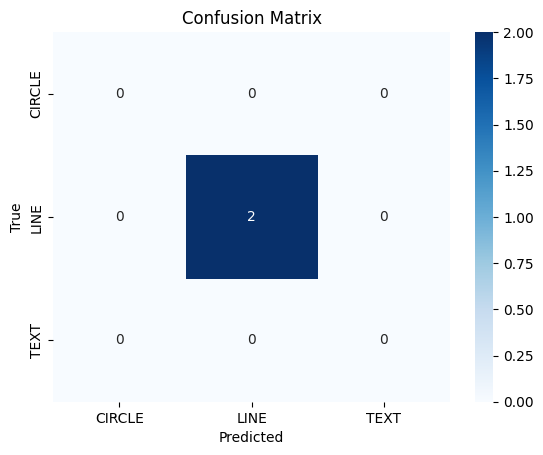

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("output_cad_with_bbox.csv")

# 2. Fitur & target
X = df[['Layer', 'Length', 'Area', 'Min_X', 'Min_Y', 'Max_X', 'Max_Y']].copy()
y = df['Type']

# 3. Preprocessing
categorical_features = ['Layer']
numeric_features = ['Length', 'Area', 'Min_X', 'Min_Y', 'Max_X', 'Max_Y']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# 4. Pipeline model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Train
model.fit(X_train, y_train)

# 7. Evaluasi
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 8. Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [8]:
import ezdxf
import pandas as pd
import math

# === 1. Baca file DXF ===
file_path = "/sample_engineering_schematic.dxf"  # sesuaikan path
try:
    doc = ezdxf.readfile(file_path)
    print("✅ File DXF berhasil dibaca")
except Exception as e:
    print(f"❌ Gagal membaca file DXF: {e}")
    raise

msp = doc.modelspace()

# === 2. Fungsi bantu ===
def line_length(start, end):
    return math.dist(start, end)

def polyline_length(points):
    return sum(math.dist(points[i], points[i+1]) for i in range(len(points)-1))

def compute_bbox(points):
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    return min(xs), min(ys), max(xs), max(ys)

# === 3. Loop entitas ===
data = []
for e in msp:
    etype = e.dxftype()
    layer = e.dxf.layer
    coords = ""
    length = None
    area = None
    min_x = min_y = max_x = max_y = None

    if etype == "LINE":
        start = (e.dxf.start.x, e.dxf.start.y, e.dxf.start.z)
        end = (e.dxf.end.x, e.dxf.end.y, e.dxf.end.z)
        coords = f"{start} -> {end}"
        length = line_length(start, end)
        min_x, min_y, max_x, max_y = compute_bbox([start, end])

    elif etype == "CIRCLE":
        center = (e.dxf.center.x, e.dxf.center.y, e.dxf.center.z)
        r = e.dxf.radius
        coords = f"Center: {center}, R: {r}"
        area = math.pi * (r ** 2)
        min_x, min_y, max_x, max_y = center[0]-r, center[1]-r, center[0]+r, center[1]+r

    elif etype == "ARC":
        center = (e.dxf.center.x, e.dxf.center.y, e.dxf.center.z)
        r = e.dxf.radius
        coords = f"Center: {center}, R: {r}"
        start_angle = math.radians(e.dxf.start_angle)
        end_angle = math.radians(e.dxf.end_angle)
        length = abs(end_angle - start_angle) * r
        min_x, min_y, max_x, max_y = center[0]-r, center[1]-r, center[0]+r, center[1]+r

    elif etype in ("LWPOLYLINE", "POLYLINE"):
        points = [(p[0], p[1], 0) for p in e.get_points()] if etype == "LWPOLYLINE" else [(v.dxf.location.x, v.dxf.location.y, v.dxf.location.z) for v in e.vertices]
        coords = str(points)
        length = polyline_length(points)
        min_x, min_y, max_x, max_y = compute_bbox(points)

    elif etype == "POINT":
        point = (e.dxf.location.x, e.dxf.location.y, e.dxf.location.z)
        coords = f"Point: {point}"
        min_x = max_x = point[0]
        min_y = max_y = point[1]

    elif etype == "TEXT":
        insert = (e.dxf.insert.x, e.dxf.insert.y, e.dxf.insert.z)
        text_value = e.dxf.text
        coords = f"Insert: {insert}, Text: '{text_value}'"
        min_x = max_x = insert[0]
        min_y = max_y = insert[1]

    elif etype == "MTEXT":
        insert = (e.dxf.insert.x, e.dxf.insert.y, e.dxf.insert.z)
        text_value = e.text
        coords = f"Insert: {insert}, MText: '{text_value}'"
        min_x = max_x = insert[0]
        min_y = max_y = insert[1]

    else:
        continue

    # Hitung width, height, aspect ratio
    width = (max_x - min_x) if (max_x is not None and min_x is not None) else None
    height = (max_y - min_y) if (max_y is not None and min_y is not None) else None
    aspect_ratio = (width / height) if (width is not None and height not in (None, 0)) else None

    data.append({
        "Type": etype,
        "Layer": layer,
        "Coordinates": coords,
        "Length": length,
        "Area": area,
        "Min_X": min_x,
        "Min_Y": min_y,
        "Max_X": max_x,
        "Max_Y": max_y,
        "Width": width,
        "Height": height,
        "Aspect_Ratio": aspect_ratio
    })

# === 4. Simpan ke CSV ===
df = pd.DataFrame(data)
df.to_csv("output_cad_with_bbox_ratio.csv", index=False)
print(f"✅ Berhasil mengekstrak {len(data)} entitas ke 'output_cad_with_bbox_ratio.csv'")


✅ File DXF berhasil dibaca
✅ Berhasil mengekstrak 6 entitas ke 'output_cad_with_bbox_ratio.csv'


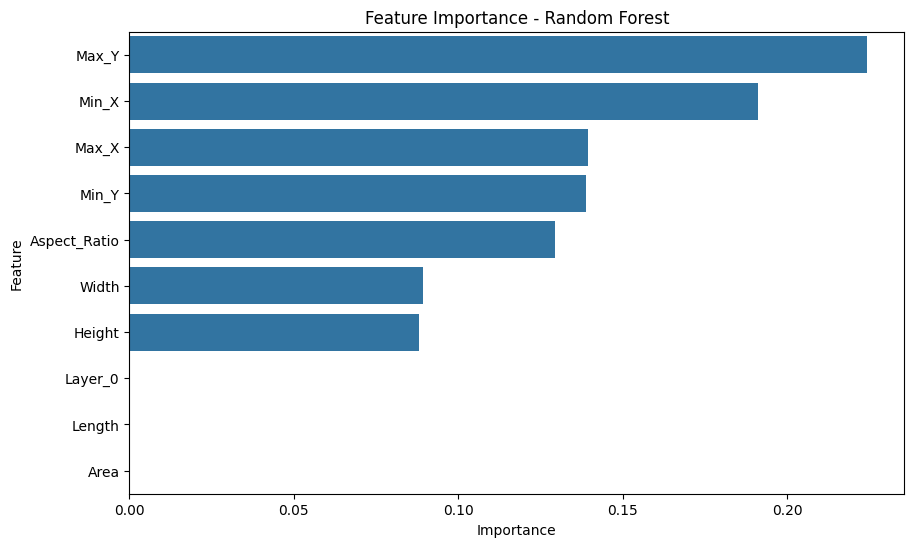

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv("output_cad_with_bbox_ratio.csv")

# 2. Fitur & target
X = df[['Layer', 'Length', 'Area', 'Min_X', 'Min_Y', 'Max_X', 'Max_Y', 'Width', 'Height', 'Aspect_Ratio']].copy()
y = df['Type']

# 3. Preprocessing
categorical_features = ['Layer']
numeric_features = ['Length', 'Area', 'Min_X', 'Min_Y', 'Max_X', 'Max_Y', 'Width', 'Height', 'Aspect_Ratio']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# 4. Pipeline model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Train
model.fit(X_train, y_train)

# 7. Feature importance
rf = model.named_steps['classifier']
feature_names = list(model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)) \
                + numeric_features
importances = rf.feature_importances_

# 8. Plot feature importance
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance - Random Forest')
plt.show()


In [10]:
import ezdxf
import pandas as pd
import math
from sentence_transformers import SentenceTransformer
import numpy as np

# === 1. Load model embedding (contoh: all-MiniLM-L6-v2) ===
embed_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# === 2. Fungsi bantu ===
def line_length(start, end):
    return math.dist(start, end)

def polyline_length(points):
    return sum(math.dist(points[i], points[i+1]) for i in range(len(points)-1))

def compute_bbox(points):
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    return min(xs), min(ys), max(xs), max(ys)

# === 3. Baca file DXF ===
file_path = "/sample_engineering_schematic.dxf"  # sesuaikan path
doc = ezdxf.readfile(file_path)
msp = doc.modelspace()

data = []

# === 4. Loop entitas ===
for e in msp:
    etype = e.dxftype()
    layer = e.dxf.layer
    coords = ""
    length = None
    area = None
    min_x = min_y = max_x = max_y = None
    text_value = None

    if etype == "LINE":
        start = (e.dxf.start.x, e.dxf.start.y, e.dxf.start.z)
        end = (e.dxf.end.x, e.dxf.end.y, e.dxf.end.z)
        coords = f"{start} -> {end}"
        length = line_length(start, end)
        min_x, min_y, max_x, max_y = compute_bbox([start, end])

    elif etype == "CIRCLE":
        center = (e.dxf.center.x, e.dxf.center.y, e.dxf.center.z)
        r = e.dxf.radius
        coords = f"Center: {center}, R: {r}"
        area = math.pi * (r ** 2)
        min_x, min_y, max_x, max_y = center[0]-r, center[1]-r, center[0]+r, center[1]+r

    elif etype == "ARC":
        center = (e.dxf.center.x, e.dxf.center.y, e.dxf.center.z)
        r = e.dxf.radius
        coords = f"Center: {center}, R: {r}"
        start_angle = math.radians(e.dxf.start_angle)
        end_angle = math.radians(e.dxf.end_angle)
        length = abs(end_angle - start_angle) * r
        min_x, min_y, max_x, max_y = center[0]-r, center[1]-r, center[0]+r, center[1]+r

    elif etype in ("LWPOLYLINE", "POLYLINE"):
        points = [(p[0], p[1], 0) for p in e.get_points()] if etype == "LWPOLYLINE" else [(v.dxf.location.x, v.dxf.location.y, v.dxf.location.z) for v in e.vertices]
        coords = str(points)
        length = polyline_length(points)
        min_x, min_y, max_x, max_y = compute_bbox(points)

    elif etype == "POINT":
        point = (e.dxf.location.x, e.dxf.location.y, e.dxf.location.z)
        coords = f"Point: {point}"
        min_x = max_x = point[0]
        min_y = max_y = point[1]

    elif etype == "TEXT":
        insert = (e.dxf.insert.x, e.dxf.insert.y, e.dxf.insert.z)
        text_value = e.dxf.text
        coords = f"Insert: {insert}, Text: '{text_value}'"
        min_x = max_x = insert[0]
        min_y = max_y = insert[1]

    elif etype == "MTEXT":
        insert = (e.dxf.insert.x, e.dxf.insert.y, e.dxf.insert.z)
        text_value = e.text
        coords = f"Insert: {insert}, MText: '{text_value}'"
        min_x = max_x = insert[0]
        min_y = max_y = insert[1]

    else:
        continue

    # Hitung width, height, aspect ratio
    width = (max_x - min_x) if (max_x is not None and min_x is not None) else None
    height = (max_y - min_y) if (max_y is not None and min_y is not None) else None
    aspect_ratio = (width / height) if (width is not None and height not in (None, 0)) else None

    # Buat embedding teks (jika ada teks)
    if text_value:
        embedding = embed_model.encode(text_value)
    else:
        embedding = np.zeros(embed_model.get_sentence_embedding_dimension())

    data.append({
        "Type": etype,
        "Layer": layer,
        "Coordinates": coords,
        "Length": length,
        "Area": area,
        "Min_X": min_x,
        "Min_Y": min_y,
        "Max_X": max_x,
        "Max_Y": max_y,
        "Width": width,
        "Height": height,
        "Aspect_Ratio": aspect_ratio,
        "Text": text_value,
        **{f"Embed_{i}": embedding[i] for i in range(len(embedding))}
    })

# === 5. Simpan dataset gabungan ===
df = pd.DataFrame(data)
df.to_csv("output_cad_geometry_text_embeddings.csv", index=False)
print(f"✅ Dataset gabungan disimpan ke 'output_cad_geometry_text_embeddings.csv' dengan {len(df)} entitas")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Dataset gabungan disimpan ke 'output_cad_geometry_text_embeddings.csv' dengan 6 entitas


              precision    recall  f1-score   support

        LINE       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



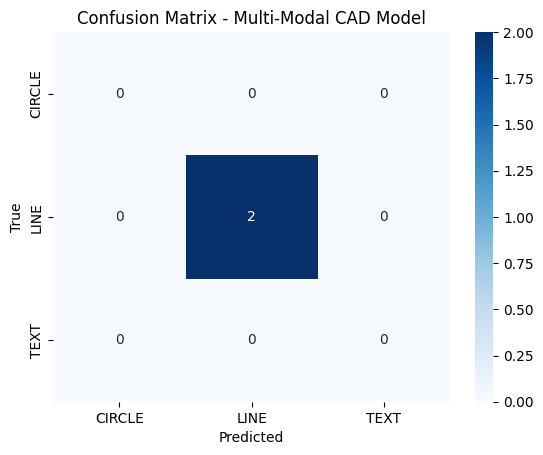

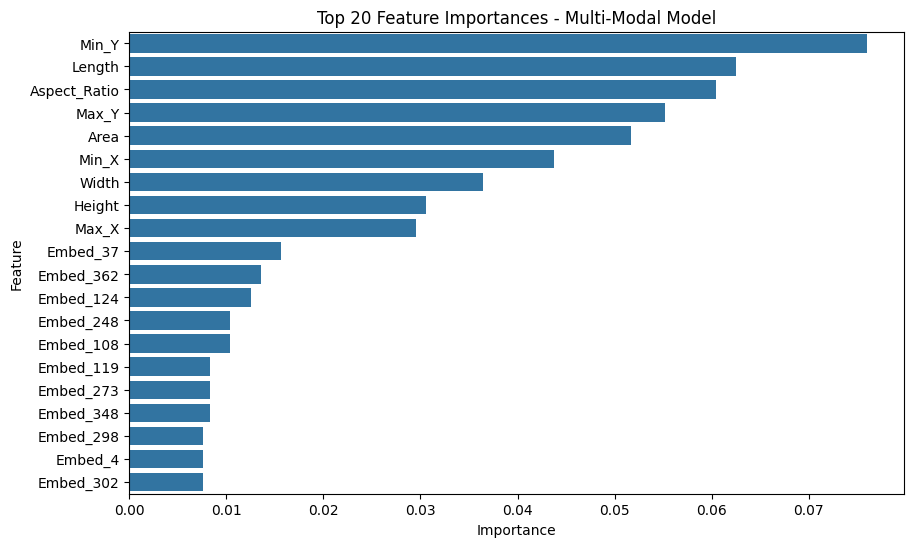

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset gabungan ===
df = pd.read_csv("output_cad_geometry_text_embeddings.csv")

# === 2. Tentukan kolom fitur numerik & embedding ===
numeric_features = ['Length', 'Area', 'Min_X', 'Min_Y', 'Max_X', 'Max_Y', 'Width', 'Height', 'Aspect_Ratio']
embedding_features = [col for col in df.columns if col.startswith("Embed_")]

# Target label (misalnya Type atau kategori lain)
y = df['Type']

# === 3. Tangani missing values ===
df[numeric_features] = df[numeric_features].fillna(0)

# === 4. Normalisasi fitur numerik ===
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(df[numeric_features])

# === 5. Gabungkan numerik + embedding ===
X = np.hstack([numeric_scaled, df[embedding_features].values])

# === 6. Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === 7. Latih model ===
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# === 8. Evaluasi ===
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Multi-Modal CAD Model')
plt.show()

# === 9. Feature importance (opsional) ===
importances = model.feature_importances_
feature_names = numeric_features + embedding_features
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)  # top 20

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Top 20 Feature Importances - Multi-Modal Model')
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# LightGBM opsional
try:
    import lightgbm as lgb
    HAS_LGB = True
except Exception:
    HAS_LGB = False

# 1) Load dataset
df = pd.read_csv("output_cad_geometry_text_embeddings.csv")

# 2) Kolom fitur
numeric_features = ['Length', 'Area', 'Min_X', 'Min_Y', 'Max_X', 'Max_Y', 'Width', 'Height', 'Aspect_Ratio']
embedding_features = [c for c in df.columns if c.startswith("Embed_")]

# Guard: jika tak ada embedding
if len(embedding_features) == 0:
    print("⚠️ Tidak ada kolom embedding (Embed_*) di dataset. Pastikan langkah pembuatan embedding dijalankan.")
    # tetap lanjut dengan fitur numerik saja
    X_embed_full = np.empty((len(df), 0))
else:
    X_embed_full = df[embedding_features].astype(float).values

# 3) Target multi-output (buat dummy Function jika belum ada)
if 'Function' not in df.columns:
    np.random.seed(42)
    df['Function'] = np.random.choice(['Structural', 'Electrical', 'Plumbing'], size=len(df))

y = df[['Type', 'Function']].copy()

# 4) Siapkan fitur numerik
X_num_full = df[numeric_features].copy().fillna(0).astype(float)

# 5) Train-test split (stratify by Type jika memungkinkan)
stratify_vec = None
vc = df['Type'].value_counts()
if df['Type'].nunique() > 1 and (vc.min() >= 2):
    stratify_vec = df['Type']

idx = np.arange(len(df))
idx_train, idx_test = train_test_split(idx, test_size=0.3, random_state=42, stratify=stratify_vec)

X_num_train = X_num_full.iloc[idx_train]
X_num_test  = X_num_full.iloc[idx_test]
X_embed_train = X_embed_full[idx_train]
X_embed_test  = X_embed_full[idx_test]
y_train = y.iloc[idx_train]
y_test  = y.iloc[idx_test]

# 6) Scale numerik (fit di train)
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_test_scaled  = scaler.transform(X_num_test)

# 7) PCA untuk embedding (fit di train, komponen dinamis)
if X_embed_train.shape[1] > 0:
    max_components = min(X_embed_train.shape[1], max(1, X_embed_train.shape[0] - 1))
    n_components_safe = min(50, max_components)  # target 50, tapi tidak melebihi batas
    if n_components_safe >= 1:
        pca = PCA(n_components=n_components_safe, random_state=42)
        X_embed_train_red = pca.fit_transform(X_embed_train)
        X_embed_test_red  = pca.transform(X_embed_test)
    else:
        # Kasus sangat kecil: lewati PCA
        X_embed_train_red = X_embed_train
        X_embed_test_red  = X_embed_test
else:
    X_embed_train_red = np.empty((X_embed_train.shape[0], 0))
    X_embed_test_red  = np.empty((X_embed_test.shape[0], 0))

# 8) Gabungkan numerik + embedding
X_train = np.hstack([X_num_train_scaled, X_embed_train_red])
X_test  = np.hstack([X_num_test_scaled,  X_embed_test_red])

# 9) Model 1: RandomForest (multi-output)
rf_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=300, random_state=42))
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_acc_type = accuracy_score(y_test['Type'], rf_preds[:, 0])
rf_acc_func = accuracy_score(y_test['Function'], rf_preds[:, 1])

print("=== Akurasi RandomForest ===")
print(f"Type: {rf_acc_type:.3f} | Function: {rf_acc_func:.3f}")

# 10) Model 2: LightGBM (multi-output) - jika tersedia
if HAS_LGB:
    lgb_model = MultiOutputClassifier(lgb.LGBMClassifier(n_estimators=500, random_state=42))
    lgb_model.fit(X_train, y_train)
    lgb_preds = lgb_model.predict(X_test)

    lgb_acc_type = accuracy_score(y_test['Type'], lgb_preds[:, 0])
    lgb_acc_func = accuracy_score(y_test['Function'], lgb_preds[:, 1])

    print("=== Akurasi LightGBM ===")
    print(f"Type: {lgb_acc_type:.3f} | Function: {lgb_acc_func:.3f}")
else:
    print("⚠️ LightGBM tidak tersedia; lewati perbandingan LGBM.")


=== Akurasi RandomForest ===
Type: 1.000 | Function: 0.500
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopp

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [14]:
print("Samples total:", len(df))
print("Embed shape (full):", X_embed_full.shape)
print("Train/Test:", X_train.shape, X_test.shape)
if X_embed_train.shape[1] > 0:
    print("PCA components used:", n_components_safe)


Samples total: 6
Embed shape (full): (6, 384)
Train/Test: (4, 12) (2, 12)
PCA components used: 3


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# LightGBM params
lgbm_params = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# RandomForest params
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Randomized search untuk efisiensi
lgbm_search = RandomizedSearchCV(
    LGBMClassifier(random_state=42),
    lgbm_params,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42
)

rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42
)


In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Fit RandomizedSearchCV to find the best parameters
lgbm_search.fit(X, y)
rf_search.fit(X, y)

lgbm_scores = cross_val_score(LGBMClassifier(**lgbm_search.best_params_), X, y, cv=cv)
rf_scores = cross_val_score(RandomForestClassifier(**rf_search.best_params_), X, y, cv=cv)

print("LightGBM CV Accuracy:", lgbm_scores.mean(), "+/-", lgbm_scores.std())
print("RandomForest CV Accuracy:", rf_scores.mean(), "+/-", rf_scores.std())

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, Non

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 4
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, Non

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_sco

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 4
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, Non

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, Non


[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 3
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because ther

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, Non

[LightGBM] [Info] Number of positive: 1, number of negative: 3
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no m

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, Non

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 4
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, Non

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 4
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, Non

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 4
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, Non

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 6, number of used features: 0
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -0.405465
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/us

Best parameters for LightGBM: {'estimator__num_leaves': 15, 'estimator__n_estimators': 100, 'estimator__max_depth': -1, 'estimator__learning_rate': 0.05}
Best parameters for RandomForest: {'estimator__n_estimators': 200, 'estimator__min_samples_split': 2, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 5}


In [20]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split # Not used in this cell
# from sklearn.preprocessing import StandardScaler # Not used in this cell
# from sklearn.decomposition import PCA # Not used in this cell
# from sklearn.multioutput import MultiOutputClassifier # Not used in this cell
# from sklearn.ensemble import RandomForestClassifier # Not used in this cell
# from sklearn.metrics import accuracy_score # Not used in this cell

# LightGBM opsional
try:
    import lightgbm as lgb
    HAS_LGB = True
except Exception:
    HAS_LGB = False

# 1) Load dataset
df = pd.read_csv("output_cad_geometry_text_embeddings.csv")

# 2) Kolom fitur
numeric_features = ['Length', 'Area', 'Min_X', 'Min_Y', 'Max_X', 'Max_Y', 'Width', 'Height', 'Aspect_Ratio']
embedding_features = [c for c in df.columns if c.startswith("Embed_")]

# Calculate num_geom_features and embedding_dim
num_geom_features = len(numeric_features)
embedding_dim = len(embedding_features)

# Misal: fitur geometri di awal kolom, embedding di akhir
geom_cols = numeric_features # Use actual numeric feature names
embed_cols = embedding_features # Use actual embedding feature names

# Combine features
# Ensure columns are in the correct order if needed for feature importance naming later
all_features = numeric_features + embedding_features
X_full = df[all_features].copy().fillna(0).astype(float)


# 3) Target multi-output (buat dummy Function jika belum ada)
if 'Function' not in df.columns:
    np.random.seed(42)
    df['Function'] = np.random.choice(['Structural', 'Electrical', 'Plumbing'], size=len(df))

y = df[['Type', 'Function']].copy()

# Use the best model found in the previous step (assuming lgbm_search was run)
if HAS_LGB and lgbm_search.best_estimator_:
    final_model = lgbm_search.best_estimator_
    model_name = "LightGBM"
elif rf_search.best_estimator_:
     final_model = rf_search.best_estimator_
     model_name = "RandomForest"
else:
    # Fallback if no search was run (shouldn't happen if previous cells executed)
    from sklearn.multioutput import MultiOutputClassifier
    from lightgbm import LGBMClassifier
    final_model = MultiOutputClassifier(LGBMClassifier(random_state=42))
    final_model.fit(X_full, y) # Fit on full data for importance if no search
    model_name = "Default LightGBM"


# Fit the chosen model on the full dataset for feature importance if it hasn't been fitted
if not hasattr(final_model, 'estimators_'): # Check if it's a MultiOutputClassifier and fitted
     final_model.fit(X_full, y)


# Ambil importance
# MultiOutputClassifier has feature_importances_ on its base_estimator if it's a tree-based model
if hasattr(final_model.estimator, 'feature_importances_'):
    importances = np.mean([est.feature_importances_ for est in final_model.estimators_], axis=0)
elif hasattr(final_model, 'feature_importances_'): # For single output models as fallback
     importances = final_model.feature_importances_
else:
     print("Warning: Feature importances not available for this model type.")
     importances = np.zeros(X_full.shape[1]) # Default to zeros


# Buat DataFrame
feat_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
})

# Agregasi per kelompok
group_importance = feat_df.groupby(
    feat_df['feature'].apply(lambda x: 'Geometry' if x in numeric_features else 'Embedding')
)['importance'].sum().reset_index()

print(f"Feature Importance Aggregation ({model_name}):")
print(group_importance)

# Optional: print individual feature importances
# print("\nIndividual Feature Importances:")
# print(feat_df.sort_values(by='importance', ascending=False).head(20))

Feature Importance Aggregation (LightGBM):
     feature  importance
0  Embedding         0.0
1   Geometry         0.0
